# INFS768 - Final Project

## Zillow Home Valuation
## Ensemble Decision Trees

Wisam Barkho  
12/06/2018

## Import Libraries / Import Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
import mglearn

## Outer Join 2016+2017 data

In [2]:
df1 = pd.read_csv('training_2016.csv', index_col=0, na_values=['NA'], sep=',',low_memory=False)
df2 = pd.read_csv('training_2017.csv', index_col=0, na_values=['NA'], sep=',',low_memory=False)
dataset = df1.merge(df2, how='outer')
dataset.to_csv('merged_data.csv')

In [3]:
dataset.head()

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,heatingorsystemtypeid,...,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,censustractandblock
0,10711738.0,0.0276,209.0,3.0,4.0,4.0,2538.0,2538.0,6037.0,2.0,...,12447.0,3101.0,96339.0,0.0,1978.0,245180.0,567112.0,2015.0,321932.0,6.037113e+13
1,10711755.0,-0.0182,209.0,3.0,3.0,4.0,1589.0,1589.0,6037.0,2.0,...,12447.0,3101.0,96339.0,0.0,1959.0,254691.0,459844.0,2015.0,205153.0,6.037113e+13
2,10711805.0,-0.1009,121.0,2.0,3.0,4.0,2411.0,2411.0,6037.0,2.0,...,12447.0,3101.0,96339.0,0.0,1973.0,235114.0,384787.0,2015.0,149673.0,6.037113e+13
3,10711816.0,-0.0121,93.0,2.0,4.0,4.0,2232.0,2232.0,6037.0,2.0,...,12447.0,3101.0,96339.0,0.0,1973.0,262309.0,437176.0,2015.0,174867.0,6.037113e+13
4,10711858.0,-0.0481,191.0,2.0,4.0,4.0,1882.0,1882.0,6037.0,2.0,...,12447.0,3101.0,96339.0,0.0,1973.0,232037.0,382055.0,2015.0,150018.0,6.037113e+13


In [4]:
print('The shape of our features is:', dataset.shape)

The shape of our features is: (148241, 26)


In [5]:
# drop parcelid to exclude from analysis
    # axis 1 refers to the columns
dataset = dataset.drop('parcelid', axis = 1)

# Descriptive statistics for each column
dataset.describe()

,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,...,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,censustractandblock
count,148241.000000,148241.000000,148241.000000,148241.000000,148241.000000,148241.000000,148241.000000,148241.000000,148241.000000,1.482410e+05,...,148241.000000,148241.000000,148241.000000,148241.000000,148241.000000,1.482410e+05,1.482410e+05,148241.000000,1.482410e+05,1.482410e+05
mean,0.005245,149.835450,2.220435,2.993133,4.676305,1672.244554,1649.743944,6049.021586,5.622624,3.400615e+07,...,34062.634482,2518.338793,96585.910179,1.510169,1969.140225,1.643843e+05,4.247896e+05,2015.462578,2.605450e+05,6.049340e+13
std,0.052385,78.449122,0.810469,1.023618,2.807122,685.606288,673.448227,20.755171,4.669709,2.662666e+05,...,46826.696926,808.044968,3365.135815,2.823826,23.189998,1.308985e+05,3.794774e+05,0.498599,2.951560e+05,2.060438e+11
min,-0.155500,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,6037.000000,1.000000,3.333930e+07,...,3491.000000,1286.000000,95982.000000,0.000000,1878.000000,4.400000e+01,2.200000e+01,2015.000000,2.200000e+01,6.037101e+13
25%,-0.022701,88.000000,2.000000,2.000000,4.000000,1176.000000,1166.000000,6037.000000,2.000000,3.380991e+07,...,12447.000000,1286.000000,96206.000000,0.000000,1954.000000,8.319600e+04,2.046490e+05,2015.000000,8.399200e+04,6.037401e+13
50%,0.005000,151.000000,2.000000,3.000000,5.199984,1518.000000,1495.000000,6037.000000,5.994874,3.401637e+07,...,25218.000000,3101.000000,96398.000000,0.000000,1971.000000,1.326450e+05,3.466230e+05,2015.000000,1.950000e+05,6.037621e+13
75%,0.032688,211.000000,3.000000,4.000000,7.000000,2023.000000,1984.000000,6059.000000,7.000000,3.417540e+07,...,45602.000000,3101.000000,96987.000000,0.000000,1987.000000,2.061580e+05,5.320780e+05,2016.000000,3.414460e+05,6.059042e+13
max,0.168900,350.000000,5.000000,8.000000,12.000000,4000.000000,4000.000000,6111.000000,24.000004,3.481877e+07,...,396556.004084,3101.000000,399675.000000,13.000000,2016.000000,4.653658e+06,1.561849e+07,2016.000000,1.435090e+07,6.111009e+13


## Features and Labels and Convert Data to Arrays

In [6]:
# assign logerror to an array
y = np.array(dataset['logerror'])
y = np.absolute(y)

# remove logerror from remaining data
X = dataset.drop('logerror', axis = 1)

# Saving feature names for later use
X_list = list(X.columns)

print('The shape of our features is:', X.shape)

The shape of our features is: (148241, 24)


In [7]:
X.head()

,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,...,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,censustractandblock
0,209.0,3.0,4.0,4.0,2538.0,2538.0,6037.0,2.0,34220381.0,-118620802.0,...,12447.0,3101.0,96339.0,0.0,1978.0,245180.0,567112.0,2015.0,321932.0,6.037113e+13
1,209.0,3.0,3.0,4.0,1589.0,1589.0,6037.0,2.0,34222040.0,-118622240.0,...,12447.0,3101.0,96339.0,0.0,1959.0,254691.0,459844.0,2015.0,205153.0,6.037113e+13
2,121.0,2.0,3.0,4.0,2411.0,2411.0,6037.0,2.0,34220427.0,-118618549.0,...,12447.0,3101.0,96339.0,0.0,1973.0,235114.0,384787.0,2015.0,149673.0,6.037113e+13
3,93.0,2.0,4.0,4.0,2232.0,2232.0,6037.0,2.0,34222390.0,-118618631.0,...,12447.0,3101.0,96339.0,0.0,1973.0,262309.0,437176.0,2015.0,174867.0,6.037113e+13
4,191.0,2.0,4.0,4.0,1882.0,1882.0,6037.0,2.0,34222544.0,-118617961.0,...,12447.0,3101.0,96339.0,0.0,1973.0,232037.0,382055.0,2015.0,150018.0,6.037113e+13


## Split train/test sets

In [8]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [10]:
print('X Training Data Shape:', X_train.shape)
print('y Training Data Shape:', y_train.shape)
print('X Testing Data Shape:', X_test.shape)
print('y Testing Data Shape:', y_test.shape)

X Training Data Shape: (99321, 24)
y Training Data Shape: (99321,)
X Testing Data Shape: (48920, 24)
y Testing Data Shape: (48920,)


## RandomForest

In [11]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

### Parameter determination

Determine max_depth before running the model.

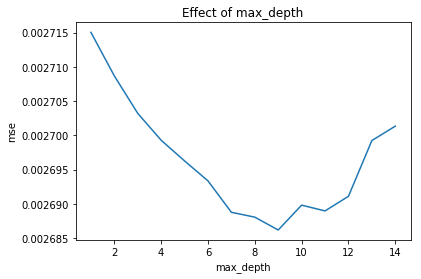

In [65]:
# Establish model
rf2 = RandomForestRegressor(n_jobs=-1, max_features='log2', random_state=42)

# Try different numbers of max_depth - this will take a minute or so
depth = np.arange(1, 15, 1)
mse = []
for n in depth:
    rf2.set_params(max_depth=n)
    rf2.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, rf2.predict(X_test)))
plt.title("Effect of max_depth")
plt.xlabel("max_depth")
plt.ylabel("mse")
plt.plot(depth, mse)

Determine n_estimators before running the model.

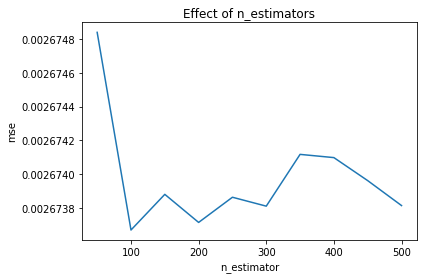

In [71]:
# Establish model
rf = RandomForestRegressor(n_jobs=-1, max_depth=10, max_features='log2', random_state=42)

# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(50, 550, 50)
mse = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, rf.predict(X_test)))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("mse")
plt.plot(estimators, mse)

### Run the model  
  
With trial and error, I found the model can have a lower MSE despite the above values.

In [14]:
start = timeit.default_timer()

forest = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='log2', random_state=42)
forest.fit(X_train, y_train)

stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  12.121598603480143


### MSE Calculation

In [15]:
# performance metric
mse = mean_squared_error(y_test, forest.predict(X_test))
print("MSE: %.8f" % mse)

MSE: 0.00117538


### Visualizing a Single Decision Tree

In [16]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [17]:
# Pull out one tree from the forest
tree = forest.estimators_[0]

print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 10


The tree is too deep to visualize here, so we will limit the depth to 4 levels.

In [18]:
# Limit depth of tree to 3 levels
forest_small = RandomForestRegressor(n_estimators=100, max_depth=3, max_features='log2', random_state=42)
forest_small.fit(X_train, y_train)

# Extract the small tree
tree_small = forest_small.estimators_[0]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png');

<img src='small_tree.png'>

### Feature Analysis

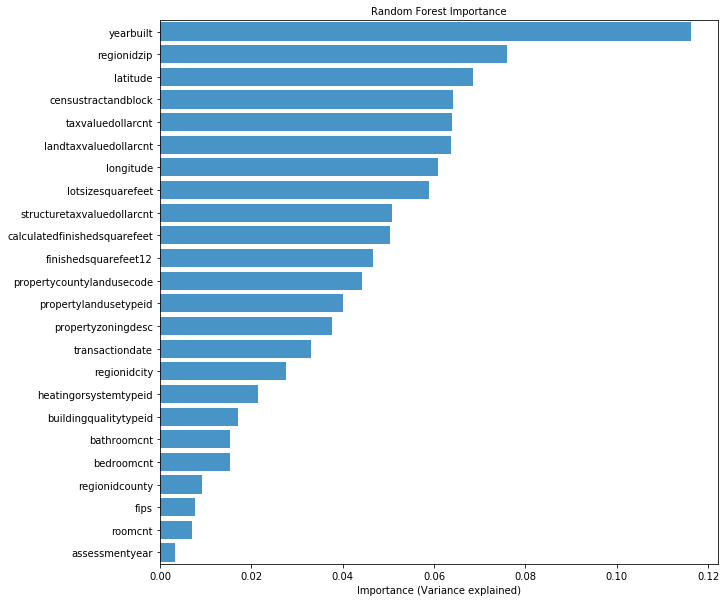

In [19]:
rf_importance = forest.feature_importances_
rf_importance_df = pd.DataFrame()
rf_importance_df['features'] = X_train.columns
rf_importance_df['importance'] = rf_importance
rf_importance_df.head();
rf_importance_df.sort_values('importance', axis=0, inplace=True, ascending=False)
rf_importance_df_trim = rf_importance_df[rf_importance_df.importance>0.001]
rf_importance_df_trim.tail()
rf_feature_list = rf_importance_df_trim.features

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x="importance", y="features", data=rf_importance_df, color='#3498db', ax=ax)
ax.set(xlabel="Importance (Variance explained)", ylabel="")
ax.set_title('Random Forest Importance', fontsize= 10)
plt.show()

## Gradient Boosted Trees

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

### Parameter determination

Determine learning_rate before running the model.

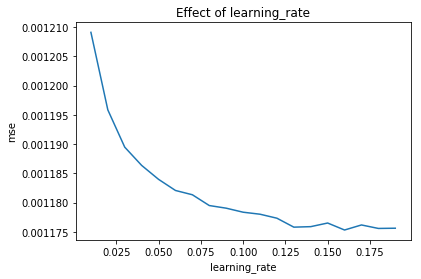

In [16]:
# Establish model
gb3 = GradientBoostingRegressor(max_features='log2', random_state=42)

# Try different numbers of learning_rate - this will take a minute or so
lr = np.arange(0.01, 0.2, 0.01)
mse = []
for n in lr:
    gb3.set_params(learning_rate=n)
    gb3.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, gb3.predict(X_test)))
plt.title("Effect of learning_rate")
plt.xlabel("learning_rate")
plt.ylabel("mse")
plt.plot(lr, mse)

Determine n_estimators before running the model.

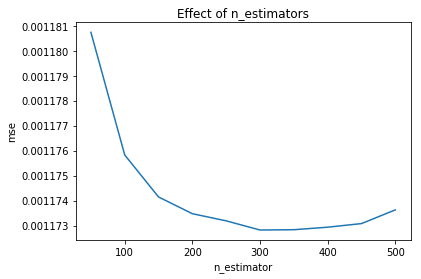

In [160]:
# Establish model
gb = GradientBoostingRegressor(learning_rate=0.13, max_features='log2', random_state=42)

# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(50, 550, 50)
mse = []
for n in estimators:
    gb.set_params(n_estimators=n)
    gb.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, gb.predict(X_test)))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("mse")
plt.plot(estimators, mse)

Determine max_depth before running the model.

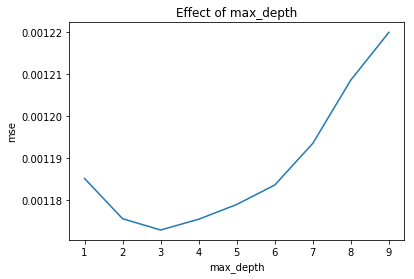

In [162]:
# Establish model
gb2 = GradientBoostingRegressor(n_estimators=300, learning_rate=0.13, max_features='log2', random_state=42)

# Try different numbers of max_depth - this will take a minute or so
depth = np.arange(1, 10, 1)
mse = []
for n in depth:
    gb2.set_params(max_depth=n)
    gb2.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, gb2.predict(X_test)))
plt.title("Effect of max_depth")
plt.xlabel("max_depth")
plt.ylabel("mse")
plt.plot(depth, mse)

### Run the model

In [20]:
start = timeit.default_timer()

gbrt = GradientBoostingRegressor(n_estimators=300, max_depth=3, learning_rate=0.13, max_features='log2', random_state=42)
gbrt.fit(X_train, y_train)

stop = timeit.default_timer()
time = stop - start
print("Time: %.3f" % time)

Time: 6.430


### MSE Calculation

In [21]:
# performance metric
mse = mean_squared_error(y_test, gbrt.predict(X_test))
print("MSE: %.8f" % mse)

MSE: 0.00117330


### Feature Analysis

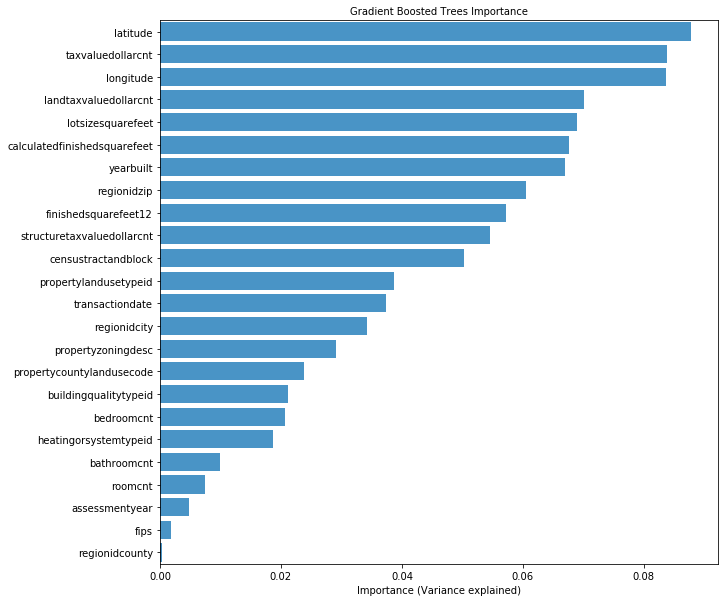

In [22]:
rf_importance = gbrt.feature_importances_
rf_importance_df = pd.DataFrame()
rf_importance_df['features'] = X_train.columns
rf_importance_df['importance'] = rf_importance
rf_importance_df.head();
rf_importance_df.sort_values('importance', axis=0, inplace=True, ascending=False)
rf_importance_df_trim = rf_importance_df[rf_importance_df.importance>0.001]
rf_importance_df_trim.tail()
rf_feature_list = rf_importance_df_trim.features

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x="importance", y="features", data=rf_importance_df, color='#3498db', ax=ax)
ax.set(xlabel="Importance (Variance explained)", ylabel="")
ax.set_title('Gradient Boosted Trees Importance', fontsize= 10)
plt.show()

## XGBoosted

In [13]:
from xgboost.sklearn import XGBRegressor
y_mean = np.mean(y_train)

### Parameter determination

Determine max_depth before running the model.

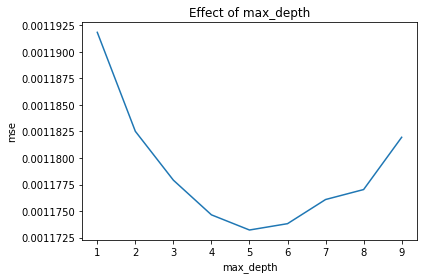

In [175]:
# Establish model
xgb2 = XGBRegressor(base_score=y_mean, random_state=42)

# Try different numbers of max_depth - this will take a minute or so
depth = np.arange(1, 10, 1)
mse = []
for n in depth:
    xgb2.set_params(max_depth=n)
    xgb2.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, xgb2.predict(X_test)))
plt.title("Effect of max_depth")
plt.xlabel("max_depth")
plt.ylabel("mse")
plt.plot(depth, mse)

Determine n_estimators before running the model.

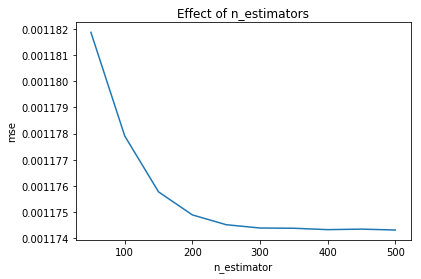

In [19]:
# Establish model
xgb = XGBRegressor(base_score=y_mean, random_state=42)

# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(50, 550, 50)
mse = []
for n in estimators:
    xgb.set_params(n_estimators=n)
    xgb.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, xgb.predict(X_test)))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("mse")
plt.plot(estimators, mse)

Determine subsample before running the model.

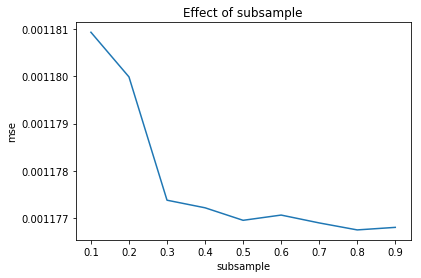

In [16]:
# Establish model
xgb4 = XGBRegressor(base_score=y_mean, random_state=42)

# Try different numbers of subsample - this will take a minute or so
ss = np.arange(0.1, 1.0, 0.1)
mse = []
for n in ss:
    xgb4.set_params(subsample=n)
    xgb4.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, xgb4.predict(X_test)))
plt.title("Effect of subsample")
plt.xlabel("subsample")
plt.ylabel("mse")
plt.plot(ss, mse)

Determine reg_alpha before running the model.

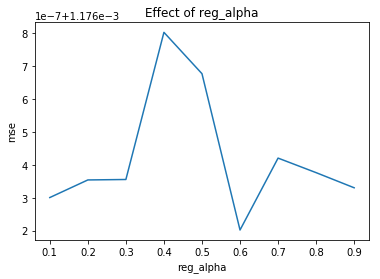

In [17]:
# Establish model
xgb5 = XGBRegressor(base_score=y_mean, random_state=42)

# Try different numbers of reg_alpha - this will take a minute or so
alpha = np.arange(0.1, 1.0, 0.1)
mse = []
for n in alpha:
    xgb5.set_params(reg_alpha=n)
    xgb5.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, xgb5.predict(X_test)))
plt.title("Effect of reg_alpha")
plt.xlabel("reg_alpha")
plt.ylabel("mse")
plt.plot(alpha, mse)

Determine reg_lambda before running the model.

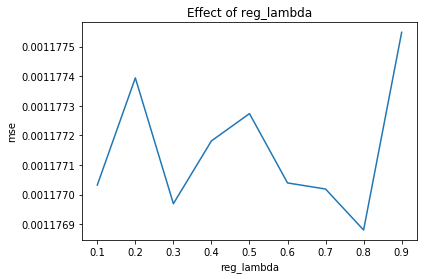

In [18]:
# Establish model
xgb6 = XGBRegressor(base_score=y_mean, random_state=42)

# Try different numbers of reg_lambda - this will take a minute or so
lmbda = np.arange(0.1, 1.0, 0.1)
mse = []
for n in lmbda:
    xgb6.set_params(reg_lambda=n)
    xgb6.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, xgb6.predict(X_test)))
plt.title("Effect of reg_lambda")
plt.xlabel("reg_lambda")
plt.ylabel("mse")
plt.plot(lmbda, mse)

### Run the model

With trial and error, I found the model can have a lower MSE despite the above values.

In [23]:
start = timeit.default_timer()

xgb_reg = XGBRegressor(max_depth=5, n_estimators=350, learning_rate=0.037, subsample=0.8, 
                       reg_alpha=0.4, reg_lambda=0.8, base_score=y_mean, random_state=42)
xgb_reg.fit(X_train, y_train)

stop = timeit.default_timer()
time = stop - start
print("Time: %.3f" % time)

Time: 62.628


### MSE Calculation

In [24]:
# performance metric
mse = mean_squared_error(y_test, xgb_reg.predict(X_test))
print("MSE: %.8f" % mse)

MSE: 0.00116985


### Feature Analysis

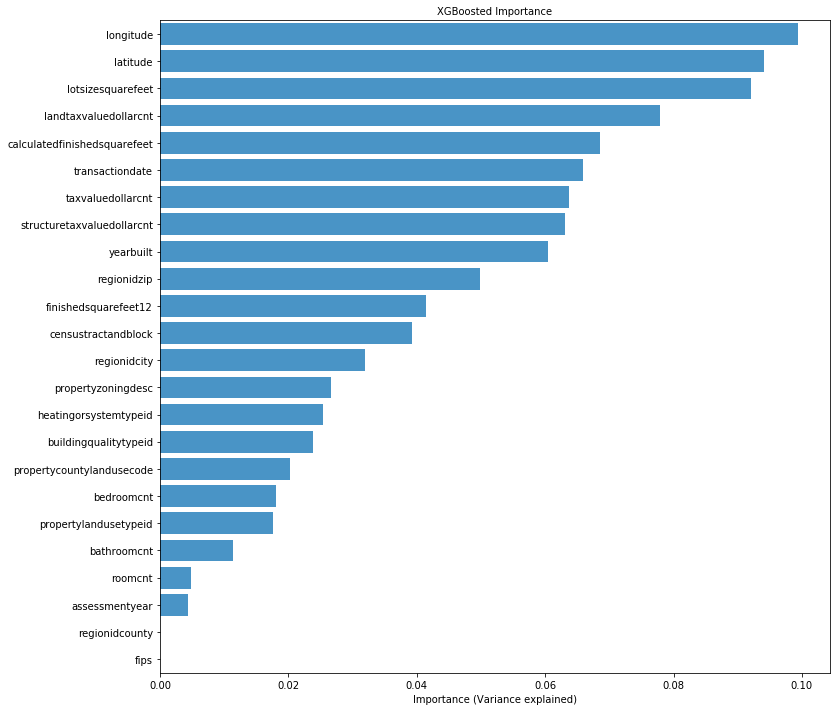

In [25]:
rf_importance = xgb_reg.feature_importances_
rf_importance_df = pd.DataFrame()
rf_importance_df['features'] = X_train.columns
rf_importance_df['importance'] = rf_importance
rf_importance_df.head();
rf_importance_df.sort_values('importance', axis=0, inplace=True, ascending=False)
rf_importance_df_trim = rf_importance_df[rf_importance_df.importance>0.001]
rf_importance_df_trim.tail()
rf_feature_list = rf_importance_df_trim.features

fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x="importance", y="features", data=rf_importance_df, color='#3498db', ax=ax)
ax.set(xlabel="Importance (Variance explained)", ylabel="")
ax.set_title('XGBoosted Importance', fontsize= 10)
plt.show()

### Linear Regression (Baseline)

In [26]:
from sklearn.linear_model import LinearRegression
logmodel = LinearRegression()
logmodel.fit(X_train,y_train)
mse = mean_squared_error(y_test, logmodel.predict(X_test))
print("MSE: %.8f" % mse)

MSE: 0.00120085


## MSE Results

<b>MSE with absolute logerror:</b>  
RandomForest-MSE: 0.00117538  
GradientBoosted-MSE: 0.00117330   
XGBoosted-MSE: 0.00116985  
Linear Regression-MSE: 0.00120085  

## Conclusion

XGBoosted has the lowest MSE